<br>
<p style="font-size: 45px;
          text-align:center;
          font-family: 'Times New Roman';
          font-variant: small-caps;
          font-weight: bold;
          line-height: 50px;"> Laboratorio II Procesamiento de señales</p>
          
<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Procesamiento de Señales Biomédicas</p>
<br>
<h1>Descripción del dataset:</h1>



<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Para el desarrollo de este laboratorio se hará uso del dataset "Pulse Transit Time PPG Dataset" en el cuál se presentan diferentes señales biomédicas registradas para diferentes pacientas realizando diferentes activadades. se cuenta con las siguientes señales:
</div>
<br>
<div style="text-align: justify;width:60%;margin: 0 auto"> 
<ul>
        <li> ecg: 3-lead ECG captured at 500Hz
        <li> peaks: CSV ONLY, annotated in WFDB. The annotated ECG R peak (1 = peak, 0 = no peak)
        <li> pleth_1: MAX30101 red wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_2: MAX30101 infrared wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_3: MAX30101 green wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_4: MAX30101 red wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_5: MAX30101 infrared wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_6: MAX30101 green wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> lc_1: TAL221 load cell proximal phalanx (first segment) PPG sensor attachment pressure (arbitrary units, 80Hz)
        <li> lc_2: TAL221 load cell (base segment) PPG sensor attachment pressure (arbitrary units, 80Hz)
        <li> temp_1: distal phalanx (first segment) PPG sensor temperature (°C, 10Hz)
        <li> temp_2: proximal phalanx (base segment) PPG sensor temperature in (°C, 10Hz)
        <li> temp_3: InvenSenseMPU-9250 IMU temperature (°C, 500Hz)
        <li> a_x: InvenSenseMPU-9250 IMU acceleration in x-direction (g, 500Hz)
        <li> a_y: InvenSenseMPU-9250 IMU acceleration in y-direction (g, 500Hz)
        <li> a_z: InvenSenseMPU-9250 IMU acceleration in z-direction (g, 500Hz)
        <li> g_x: InvenSenseMPU-9250 IMU angular velocity around x-axis (°/s, 500Hz)
        <li> g_y: InvenSenseMPU-9250 IMU angular velocity around y-axis (°/s, 500Hz)
        <li> g_z: InvenSenseMPU-9250 IMU angular velocity around z-axis (°/s, 500Hz)

</ul>
</div>

Por ejemplo para el sujeto de prueba s1 se presenta la lectura de los datos registrados en la actividad de correr:

In [4]:
from pathlib import Path
import pandas as pd 

def get_data(subject="s10"):
    cwd=Path.cwd()

    DATA_DIR=cwd/"data"

    df=pd.read_csv(DATA_DIR/f"{subject}_run.csv")
    
    return df
df=get_data(subject="s10")

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,3)

def plot_signal(x,y):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.

    ax.plot(x,y)  # Plot some data on the axes.

    
    plt.grid(visible=True, which='major', color='k', linestyle='-',alpha=0.3)
    plt.grid(visible=True, which='minor', color='k', linestyle='-',alpha=0.1)
    plt.minorticks_on()


def display_signal(t_inicial=300,signal="ecg"):
    N=2000
    Ts=0.002
    n_ini=int(t_inicial/Ts)
    t=np.arange(0,N+1)*Ts+t_inicial
    plot_signal(t,df.loc[n_ini:n_ini+N,signal])
    plt.title(signal)
    plt.xlim([0+t_inicial,N*Ts+t_inicial])
    plt.xlabel("time[sec]")
    # return x
interact(display_signal, t_inicial=widgets.IntSlider(min=0,max=400,step=1,value=300),signal=df.columns[1:]);

interactive(children=(IntSlider(value=300, description='t_inicial', max=400), Dropdown(description='signal', o…

In [7]:
def get_sample_period_and_freq(df):
    """ Function that calculates the mean max min sample period of the signal"""
    
    Ts_mean=pd.to_datetime(df["time"]).diff().shift(-1).mean().total_seconds()
    Ts_max=pd.to_datetime(df["time"]).diff().shift(-1).max().total_seconds()
    Ts_min=pd.to_datetime(df["time"]).diff().shift(-1).min().total_seconds()
    print(f"Ts_mean= {Ts_mean},Ts_max= {Ts_max},Ts_min= {Ts_min}")
    Fs=1/Ts_mean
    return Fs,Ts_mean
Fs, Ts = get_sample_period_and_freq(df)
print(f"Signal with sample period of {Ts} [sec] and sample frequency of {Fs}[Hz]")

Ts_mean= 0.002,Ts_max= 0.002001,Ts_min= 0.002
Signal with sample period of 0.002 [sec] and sample frequency of 500.0[Hz]


In [8]:
df.columns

Index(['time', 'ecg', 'peaks', 'pleth_1', 'pleth_2', 'pleth_3', 'pleth_4',
       'pleth_5', 'pleth_6', 'lc_1', 'lc_2', 'temp_1', 'temp_2', 'temp_3',
       'a_x', 'a_y', 'a_z', 'g_x', 'g_y', 'g_z'],
      dtype='object')

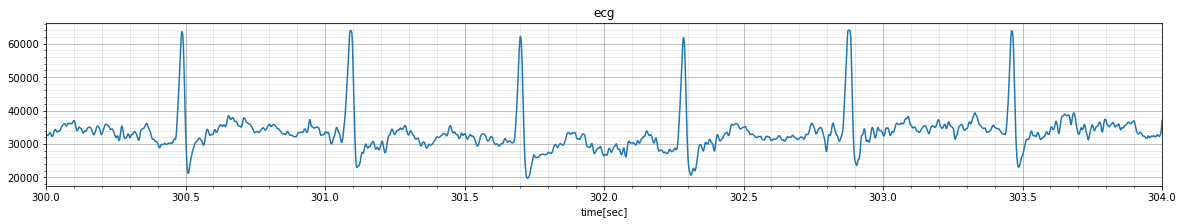

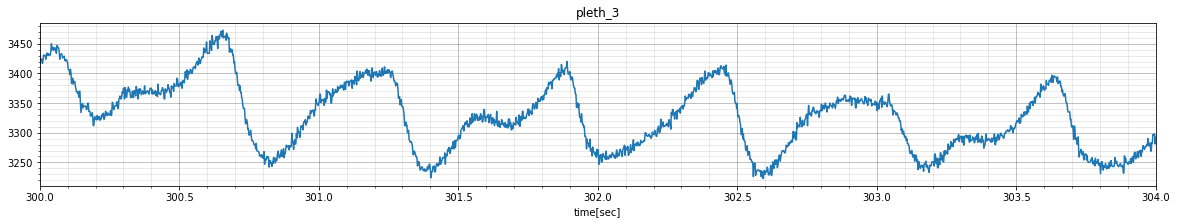

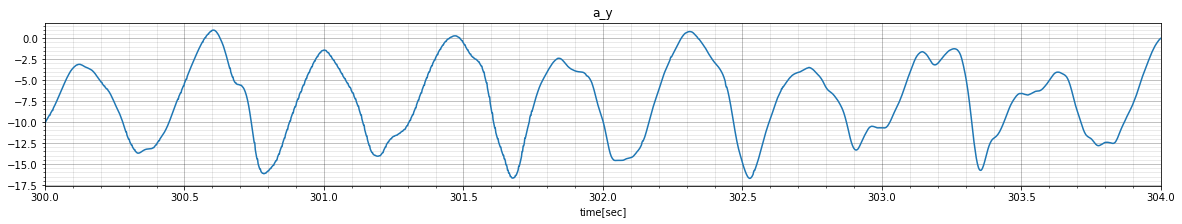

In [9]:
display_signal(t_inicial=300,signal="ecg")
display_signal(t_inicial=300,signal="pleth_3")
display_signal(t_inicial=300,signal="a_y")

<h2>Caso considerando toda la señal</h2>

In [11]:
def get_autocorr(x):
    x=x-np.mean(x)

    y = np.correlate(x, x, 'full')
    y = y/np.max(y)
    return y

x=df.loc[:,"ecg"].to_numpy()
rxx=get_autocorr(x)
rxx

array([7.29553953e-08, 1.07706289e-07, 9.40272286e-08, ...,
       9.40272286e-08, 1.07706289e-07, 7.29553953e-08])

[]

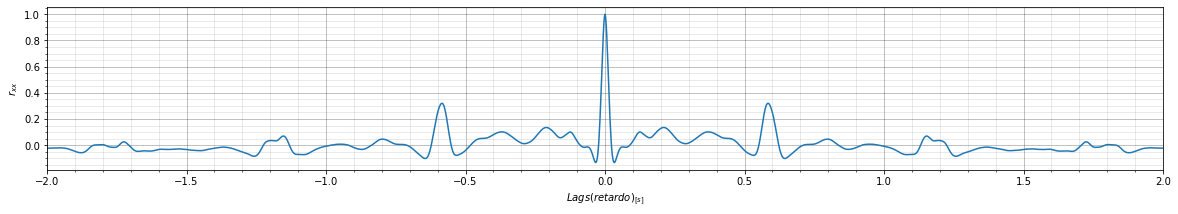

In [13]:
lag_samples=(np.arange(len(rxx)) - (len(rxx)-1)/2 ) # Desplazamiento para centrar el retraso 0
lag_seconds=lag_samples*0.002
plot_signal(x=lag_seconds,y=rxx)
plt.xlim([-2,2])
plt.ylabel("$r_{xx}$")
plt.xlabel("$Lags (retardo)_{[s]}$")
plt.plot()

In [15]:
lag_samples.max()

242814.0

In [17]:
from scipy.signal import find_peaks
def find_lag_sample_peaks_sorted_by_rxx(rxx):
    
    lag_sample_peaks, _  = find_peaks(rxx)

    rxx_height_map = {l_n:y for l_n,y in zip(lag_sample_peaks,rxx[lag_sample_peaks])}

    lag_sample_peaks_sorted_by_rxx=sorted(lag_sample_peaks,key=lambda x: rxx_height_map[x], reverse=True)

    return lag_sample_peaks_sorted_by_rxx

lag_sample_peaks_sorted_by_rxx=find_lag_sample_peaks_sorted_by_rxx(rxx)

print(f"Las muestras del retraso donde se presentan los 3 picos más altos son\n\
        {lag_sample_peaks_sorted_by_rxx[:3]}-> [sample]\n\
        {lag_seconds[lag_sample_peaks_sorted_by_rxx[:3]]}->[seconds]\n\
        {rxx[lag_sample_peaks_sorted_by_rxx[:3]]}->[rxx value]\n ")

Las muestras del retraso donde se presentan los 3 picos más altos son
        [242814, 242522, 243106]-> [sample]
        [ 0.    -0.584  0.584]->[seconds]
        [1.         0.31999632 0.31999632]->[rxx value]
 


[]

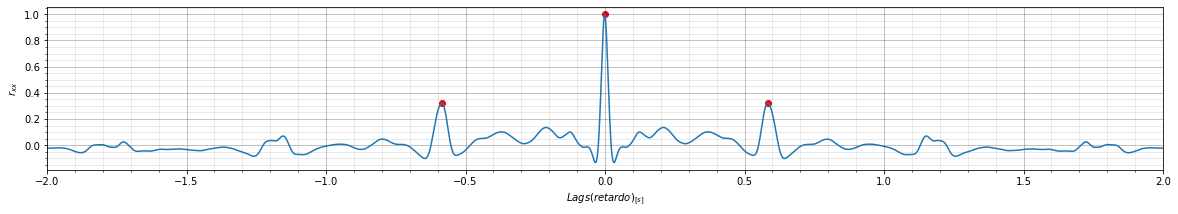

In [18]:
lag_samples=(np.arange(len(rxx))-len(rxx)/2)
lag_seconds=lag_samples*0.002
plot_signal(x=lag_seconds,y=rxx)
plt.xlim([-2,2])
plt.scatter(
    x=lag_seconds[lag_sample_peaks_sorted_by_rxx[:3]],
    y=rxx[lag_sample_peaks_sorted_by_rxx[:3]],
    c="r"
)
plt.ylabel("$r_{xx}$")
plt.xlabel("$Lags (retardo)_{[s]}$")
plt.plot()

<h1> Solución </h1>
    <h2>A) Selección del tamaño de la ventana de tiempo </h2>
    
    Dado que se está trabajando con una señal que proviene de un electrocardiograma, se sabe que la frecuencia máxima de una persona saludable está dada por 220[ppm]-(edad_de_la_persona), en este caso de los datos obtenidos la persona más joven del experimento tiene 20 años de edad, por consiguiente se considerará una frecuencia máxima de 200ppm, esto siginifica que en el peor escenario (para personas saludables) se espera tener un periodo mínimo de la señal de:
$$
  T_{s min} = \frac{60}{200 [ppm]}= 0.3 [seconds] 
$$

    Ahora bien para la frecuencia cardiaca mínima de las personas será del 30% del valor saludable que es de 60ppm, es decir, la mínima frecuencia cardiaca esperable será de 20ppm, por ende el valor máximo del periodo de la señal esperado será de:

$$
  T_{s max} = \frac{60}{20 [ppm]}= 3 [seconds] 
$$



In [19]:
def get_Ts_from_ppm(ppm):
    return 60/ppm
get_Ts_from_ppm(ppm=200),get_Ts_from_ppm(ppm=20)

(0.3, 3.0)


    Se puede seleccionar un valor de n veces el periodo máximo esperable de la señal. El valor médico recomendable es tomar la medida durante 15 [sec] para tener un valor confiable de la señal, con lo cual se garantiza que en el peor caso se tienen 5 oscilaciones de la señal ECG para realizar la estimación de frecuencia cardiaca. Dado que el periodo de muestreo de la señal es de 0.002 [sec] (Fs = 500 [Hz]) se sabe que 15 segundos de la señal corresponde a un total de 7500 muestras. 

<h2>B) Selección del solapamiento de la ventana de tiempo </h2>


Se selecciona un solapamiento de 1 oscilación de la señal en el peor escenario posible, es decir, de 3 [sec].

<h2>C) Cálculo de la autocorrelación </h2>

In [119]:


df=get_data(subject="s1")
df = df.loc[:,["time","ecg"]]
Ts=0.002
n=0
win_len=int(15/Ts)

x=df.loc[n:n+win_len-1,"ecg"]
rxx=get_autocorr(x)
rxx

array([1.54418418e-05, 2.81826813e-05, 3.88887856e-05, ...,
       3.88887856e-05, 2.81826813e-05, 1.54418418e-05])

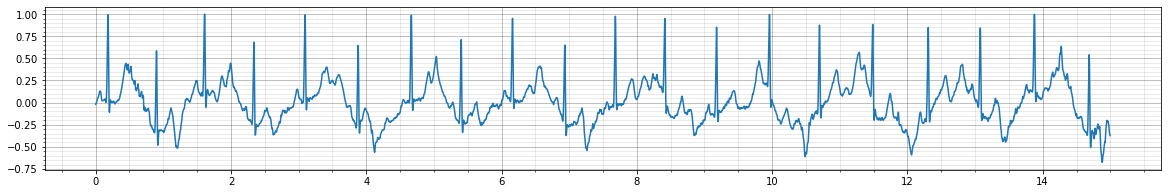

In [120]:
w=(x-np.mean(x))
w=w/np.max(w)
plot_signal(np.arange(len(x))*Ts,w)

[]

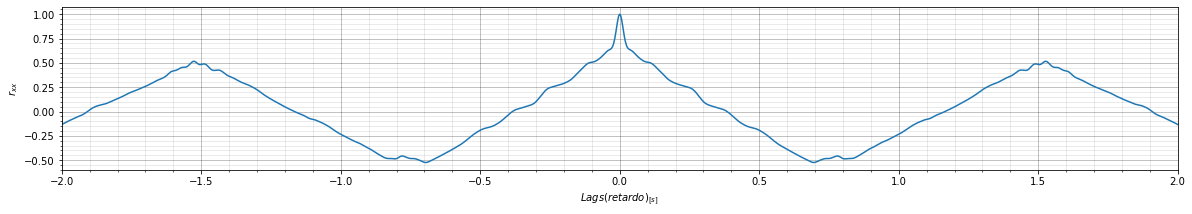

In [121]:
lag_samples=(np.arange(len(rxx)) - (len(rxx)-1)/2 ) # Desplazamiento para centrar el retraso 0
lag_seconds=lag_samples*Ts
plot_signal(x=lag_seconds,y=rxx)
plt.xlim([-2,2])
plt.ylabel("$r_{xx}$")
plt.xlabel("$Lags (retardo)_{[s]}$")
plt.plot()

<h2>D) Encontrar de forma automática el periodo estimado de la señal </h2>

In [22]:
lag_sample_peaks_sorted_by_rxx=find_lag_sample_peaks_sorted_by_rxx(rxx)

print(f"Las muestras del retraso donde se presentan los 3 picos más altos son\n\
        {lag_sample_peaks_sorted_by_rxx[:3]}-> [sample]\n\
        {lag_seconds[lag_sample_peaks_sorted_by_rxx[:3]]}->[seconds]\n\
        {rxx[lag_sample_peaks_sorted_by_rxx[:3]]}->[rxx value]\n ")

Las muestras del retraso donde se presentan los 3 picos más altos son
        [7499, 7198, 7800]-> [sample]
        [ 0.    -0.602  0.602]->[seconds]
        [1.         0.34616271 0.34616271]->[rxx value]
 


In [23]:
T_x=abs(lag_seconds[lag_sample_peaks_sorted_by_rxx[2]])
T_x

0.602

<h2>E) Convertir el dato de periodo en frecuencia </h2>

In [24]:
Fppm_x=60/T_x
Fppm_x

99.66777408637874

<h2>E) Convertir el dato de periodo en frecuencia </h2>

In [89]:
def get_Fppm(subject):
    
    df=get_data(subject=subject)
    df = df.loc[:,["time","ecg"]]
    Ts=0.002
    n=0
    win_len=int(15/Ts)
    win_sol=int(3/Ts)
    n_iter= int((len(df)-win_len)*(1/win_sol)-1)
    
    t=np.arange(0,len(df)+1)*Ts
    
    Fppm_x_list=[]
    t_list=[]
    for _ in range(n_iter):
        x=df.loc[n:n+win_len-1,"ecg"]


        
        rxx=get_autocorr(x)

        lag_samples=(np.arange(len(rxx)) - (len(rxx)-1)/2 ) # Desplazamiento para centrar el retraso 0
        lag_seconds=lag_samples*0.002

        lag_sample_peaks_sorted_by_rxx=find_lag_sample_peaks_sorted_by_rxx(rxx)

        T_x=abs(lag_seconds[lag_sample_peaks_sorted_by_rxx[2]])


        Fppm_x=60/T_x
        
        Fppm_x_list.append(Fppm_x)
        t_list.append(t[n])
        
        n+=win_sol
        
    return t_list,Fppm_x_list

def main_plot_fppm(subject):
    
    t,Fppm=get_Fppm(subject)
    plot_signal(t,Fppm)

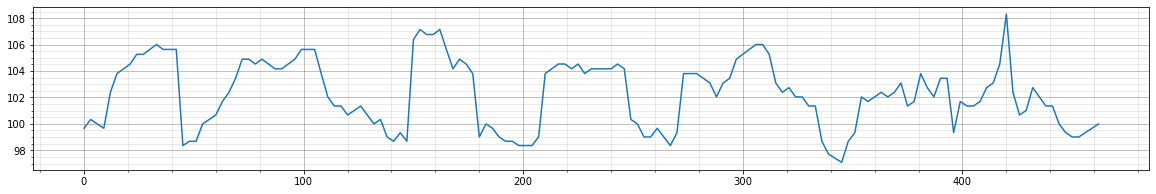

In [90]:
main_plot_fppm(subject="s10")

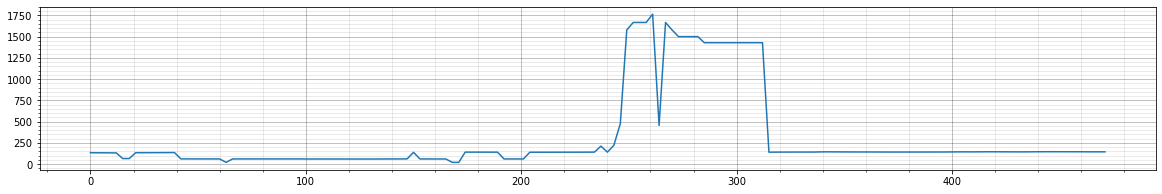

In [123]:
main_plot_fppm(subject="s2")

<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Uso de la correlación: Procesamiento de Señales Biomédicas </p>
<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
<img src="https://deep-solar-eye.github.io/img/powerDiag.png" width=80%>
</div>
<p style="text-align: center">Figura 1. Pérdidas de potencia eléctrica (W) en presencia de suciedad</p>

<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Correlacion Cruzada para dos señales distintas </p>
<br>


<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Clasificacion (inteligente) de patrones </p>
<br>


# Referencias 

<br>
<div style="text-align: justify;width:90%;margin: 0 auto"> 
[1]. Mehrgardt, P., Khushi, M., Poon, S., & Withana, A. (2022). Pulse Transit Time PPG Dataset (version 1.1.0). PhysioNet. https://doi.org/10.13026/jpan-6n92. <br><br>
[2] Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.. <br><br>

</div>